# Índice

1. [Introducción a Random Forest](#introducción-a-random-forest)

    1.0. [¿Qué es Random Forest?](#qué-es-random-forest)

    1.1. [Fundamentos teóricos](#fundamentos-teóricos)
    
    1.2. [Proceso de predicción: Votación y Promediado](#proceso-de-predicción-votación-y-promediado)

    1.3. [Ventajas y Desventajas](#ventajas-y-desventajas)

2. [Implementación del modelo](#implementación-del-modelo)

   
   2.1. [Packages](#packages)

   2.2 [Comparación de los modelos según datos](#comparación-de-los-modelos-según-datos)

   2.3. [Balancear la muestra](#balancear-la-muestra)

3. [Model pipeline](#model-pipeline)

4. [Funciones para predecir Fraudes](#funciones-para-predecir-fraudes)

5. [Guardar el modelo](#guardar-el-modelo)

# Introducción a Random Forest

## ¿Qué es Random Forest?

Dentro del vasto ecosistema de algoritmos de machine learning, el algoritmo Random Forest (o Bosque Aleatorio) se ha consolidado como una de las herramientas más poderosas y versátiles. Pertenece a la categoría de métodos de aprendizaje de conjunto (ensemble learning), que combinan las predicciones de múltiples modelos para producir un resultado más preciso y robusto que el de cualquier modelo individual.

Random Forest se construye a partir de una multitud de árboles de decisión, que son en sí mismos un tipo de algoritmo de aprendizaje supervisado. La metáfora del "bosque" es apropiada: así como un bosque está compuesto por muchos árboles, este algoritmo combina las predicciones de muchos árboles de decisión individuales para formar una predicción colectiva más fuerte y confiable.

Los árboles de decisión son algoritmos de aprendizaje supervisado que particionan recursivamente el espacio de características en regiones más pequeñas, asignando una etiqueta de clase o valor a cada región. Aunque son intuitivos y fáciles de interpretar, los árboles individuales tienden a sufrir de overfitting, especialmente con datos complejos.

## Fundamentos teóricos: 

**Bagging y Aleatoriedad de Características**

El poder de Random Forest reside en dos principios fundamentales.

- **Bagging (Bootstrap Aggregation)**: Introducido por Leo Breiman en 1996. Este método consiste en crear  múltiples subconjuntos de datos de entrenamiento mediante muestreo aleatorias con reemplazodel conjunto de datos original. Cada árbol se entrena con uno de estos subconjuntos.
- **Aleatoriedad de las Características**: En cada división de nodo, se considera solo un subconjunto aleatorio de características. Esto reduce la correlación entre los árboles. Cada subconjunto puede contener algunas observaciones repetidas y otras ausentes, lo que garantiza que cada árbol individual se entrene con una perspectiva ligeramente diferente de los datos. Al final, las predicciones de todos los árboles se combinan mediante votación mayoritaria (clasificación) o promediado (regresión).

## Proceso de predicción: Votación y Promediado

Para evitar que los árboles individuales se correlacionen demasiado (lo que ocurriría si todos los árboles se dividieran en las mismas características dominantes), Random Forest introduce una segunda capa de aleatoriedad. En cada nodo de cada árbol, el algoritmo no considera todas las características disponibles, sino que selecciona al azar un subconjunto de ellas para encontrar la mejor división.

- **Clasificación**: Cada árbol vota por una clase y la clase mayoritaria se selecciona como predicción.
- 
- **Regresión**: Se promedian las predicciones de todos los árboles.

Esta doble aleatorización (en las muestras y en las características) es lo que hace que Random Forest sea tan efectivo para reducir la varianza y mejorar la generalización.


## Ventajas y Desventajas

| Ventajas | Desventajas |
|----------|-------------|
| Alta precisión | Complejidad computacional |
| Robustez ante ruido y valores atípicos | Requiere más recursos |
| Maneja datos de alta dimensión | Menor interpretabilidad ("caja negra") |
| Flexibilidad (clasificación y regresión) | Período de entrenamiento largo |
| No requiere escalamiento de características | Puede tender a sobreajustar si no se sintoniza |
| Puede manejar valores faltantes | Tiende a tener un sesgo hacia variables con muchos valores únicos |

# Implementación del modelo

## Packages

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath(".."))

from mlparadetectarfraudes.data import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel

## Importar datos estandarizados

In [3]:
# Cargar el DataFrame filtrado desde data/processed
X_processed_df = pd.read_csv('../data/processed/Preparation-X_processed_df.csv')
data_filtrada = pd.read_csv('../data/processed/EDA-data_filtrada.csv')
y = data_filtrada['is_fraud']

In [5]:
import joblib
import pandas as pd

# Cargar el modelo PCA
pca = joblib.load('../models/pca_9componentes.joblib')

# Cargar los datos originales y pca
pca_df = pd.read_csv('../data/processed/pca_df.csv')


# Cargar la variable objetivo

X_processed_df = pd.read_csv('../data/processed/Preparation-X_processed_df.csv')
data_filtrada = pd.read_csv('../data/processed/EDA-data_filtrada.csv')
y = data_filtrada['is_fraud']
X = data_filtrada.drop(['is_fraud', 'transaction_datetime','user_id'], axis=1)


## Comparación de los modelos según datos

Comparación de los modelos según si se entrenan con datos procesados por pca, estandarizados o originales con variables dummies para las categorías

--- Random Forest con PCA ---
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      6322
           1       0.31      0.01      0.02      2172

    accuracy                           0.74      8494
   macro avg       0.53      0.50      0.44      8494
weighted avg       0.63      0.74      0.64      8494

ROC AUC: 0.5367
Matriz de confusión
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      6322
           1       0.31      0.01      0.02      2172

    accuracy                           0.74      8494
   macro avg       0.53      0.50      0.44      8494
weighted avg       0.63      0.74      0.64      8494

ROC AUC: 0.5367
Matriz de confusión
[[6264   58]
 [2146   26]]
[[6264   58]
 [2146   26]]


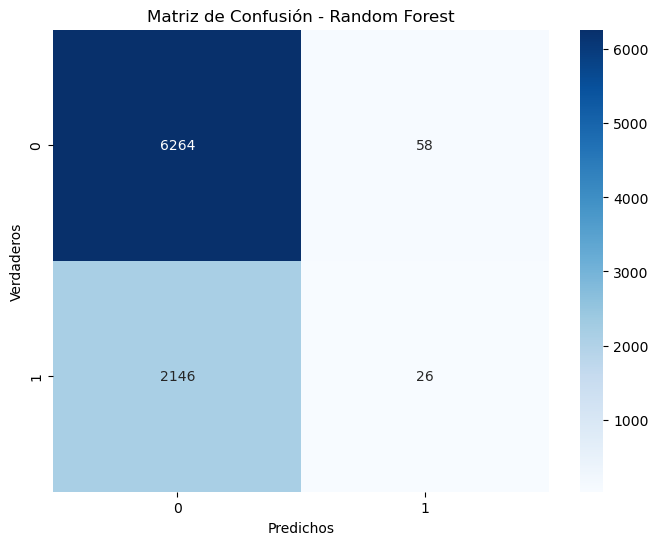


--- Random Forest con datos estandarizados ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      6322
           1       0.36      0.00      0.01      2172

    accuracy                           0.74      8494
   macro avg       0.55      0.50      0.43      8494
weighted avg       0.65      0.74      0.64      8494

ROC AUC: 0.5341
Matriz de confusión
[[6306   16]
 [2163    9]]
ROC AUC: 0.5341
Matriz de confusión
[[6306   16]
 [2163    9]]


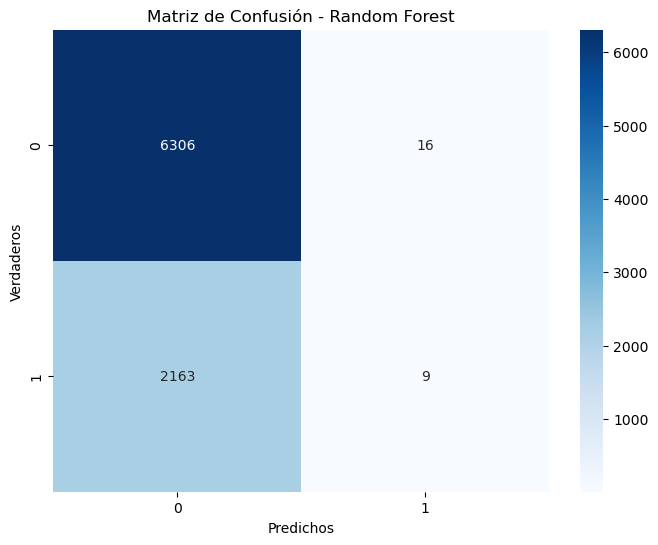


--- Random Forest con datos originales ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      6322
           1       0.40      0.01      0.01      2172

    accuracy                           0.74      8494
   macro avg       0.57      0.50      0.43      8494
weighted avg       0.66      0.74      0.64      8494

ROC AUC: 0.5328
Matriz de confusión
[[6304   18]
 [2160   12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      6322
           1       0.40      0.01      0.01      2172

    accuracy                           0.74      8494
   macro avg       0.57      0.50      0.43      8494
weighted avg       0.66      0.74      0.64      8494

ROC AUC: 0.5328
Matriz de confusión
[[6304   18]
 [2160   12]]


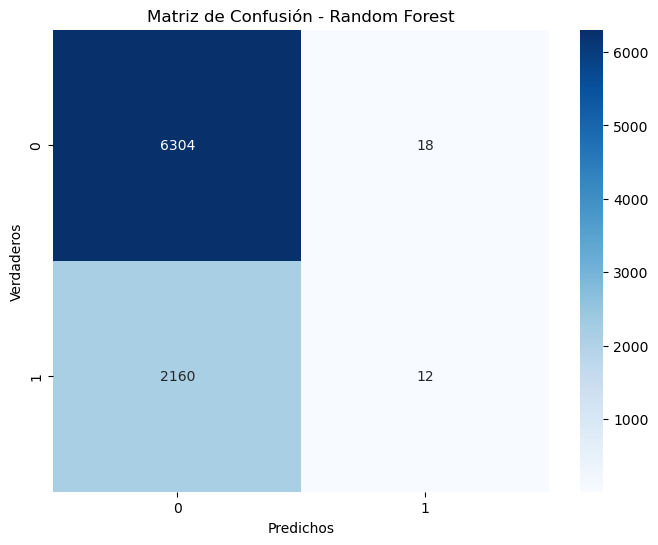

In [ ]:
# Comparar Random Forest con PCA, datos estandarizados y datos originales
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. Usar componentes principales (PCA)
pca = joblib.load('../models/pca_9componentes.joblib')
X_pca = pca.transform(X_processed_df)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
rf_pca = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_pca.fit(X_pca_train, y_pca_train)
y_pca_pred = rf_pca.predict(X_pca_test)
y_pca_pred_proba = rf_pca.predict_proba(X_pca_test)[:, 1]
print('--- Random Forest con PCA ---')
print(classification_report(y_pca_test, y_pca_pred))
print(f'ROC AUC: {roc_auc_score(y_pca_test, y_pca_pred_proba):.4f}')
# Matriz de confusión
print('Matriz de confusión')
print(confusion_matrix(y_pca_test, y_pca_pred))
cm = confusion_matrix(y_pca_test, y_pca_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# 2. Usar datos estandarizados (procesados)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)
rf_std = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_std.fit(X_std_train, y_std_train)
y_std_pred = rf_std.predict(X_std_test)
y_std_pred_proba = rf_std.predict_proba(X_std_test)[:, 1]
print('\n--- Random Forest con datos estandarizados ---')
print(classification_report(y_std_test, y_std_pred))
print(f'ROC AUC: {roc_auc_score(y_std_test, y_std_pred_proba):.4f}')
# Matriz de confusión
print('Matriz de confusión')
print(confusion_matrix(y_std_test, y_std_pred))
cm = confusion_matrix(y_std_test, y_std_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# 3. Usar datos originales (sin procesar)
# Convertir variables categóricas a numéricas (one-hot encoding)
X_orig_encoded = pd.get_dummies(X_orig)

# Split y entrenamiento como antes
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig_encoded, y, test_size=0.2, random_state=42, stratify=y)
rf_orig = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_orig.fit(X_orig_train, y_orig_train)
y_orig_pred = rf_orig.predict(X_orig_test)
y_orig_pred_proba = rf_orig.predict_proba(X_orig_test)[:, 1]
print('\n--- Random Forest con datos originales ---')
print(classification_report(y_orig_test, y_orig_pred))
print(f'ROC AUC: {roc_auc_score(y_orig_test, y_orig_pred_proba):.4f}')
# Matriz de confusión
print('Matriz de confusión')
print(confusion_matrix(y_orig_test, y_orig_pred))
cm = confusion_matrix(y_orig_test, y_orig_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()



## Balancearla muestra

Dado que la carácterística fraude es poco frecuente, se debe balancear la muestra para que funcione mejor el modelo. Hay varios métodos, SMOTE, AUTOENCODER, etc.

In [20]:
# Balancear datos con SMOTE
# Convertir variables categóricas a numéricas (one-hot encoding)
X_orig_encoded = pd.get_dummies(X_orig)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_res, y_res = smote.fit_resample(X_orig_encoded, y)

# Split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Entrenamiento
model_RF = RandomForestClassifier(
    n_estimators=100,    # Número de árboles en el bosque
    criterion='gini',    # Función para medir la calidad de la división
    max_depth=100,      # Profundidad máxima de los árboles
    min_samples_split=2, # Mínimo número de muestras requeridas para dividir un nodo interno
    min_samples_leaf=1,  # Mínimo número de muestras requeridas en un nodo hoja
    max_features='sqrt', # Número de características a considerar para buscar la mejor división
    bootstrap=True,      # Whether to use bootstrap samples when building trees
    random_state=42,     # Semilla para reproducibilidad
    class_weight='balanced',  # Ajustar pesos para clases desbalanceadas
    n_jobs=1               # Número de trabajos a ejecutar en paralelo
)
model_RF.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


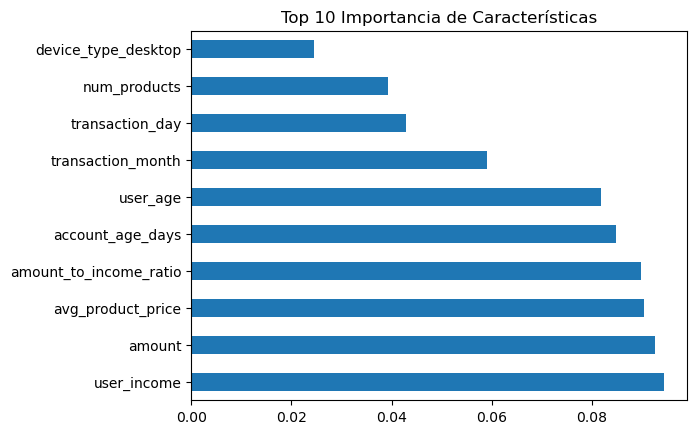

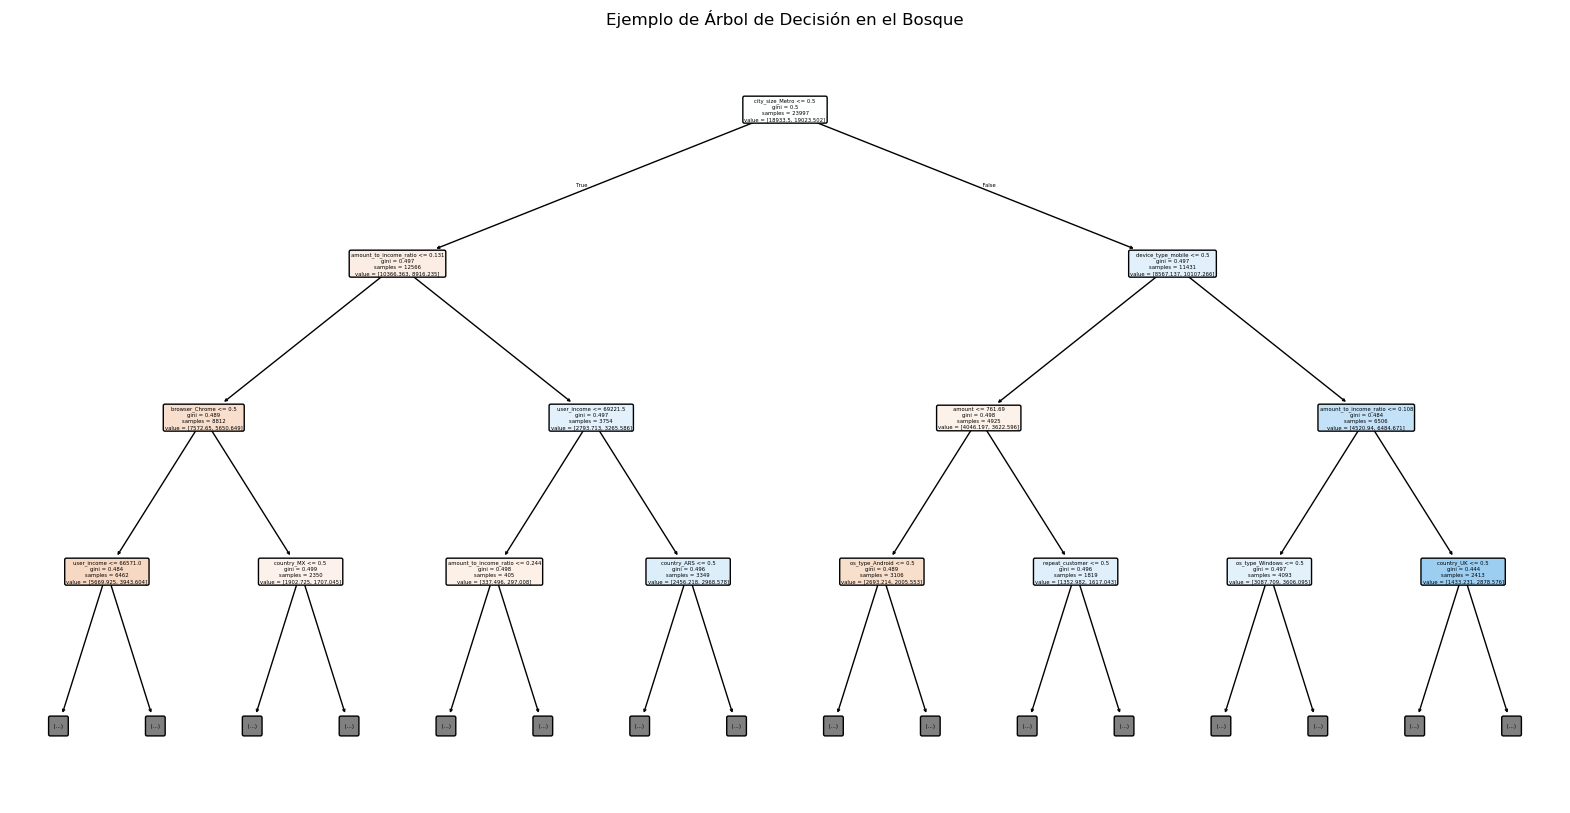

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Importancia de características
feature_importances = pd.Series(model_RF.feature_importances_, index=X_orig_encoded.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Importancia de Características')
plt.show()
# Visualización de un árbol individual (requiere graphviz)
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_RF.estimators_[0], feature_names=X_orig_encoded.columns, filled=True, rounded=True, max_depth=3)
plt.title("Ejemplo de Árbol de Decisión en el Bosque")
plt.show()

In [28]:
### . Optimización de Hiperparámetros

from sklearn.model_selection import GridSearchCV
# Definir la grilla de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Búsqueda en grilla
grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)
# Mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)


c:\Users\agust\miniconda3\envs\mlparadetectarfraudes\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
191 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\agust\miniconda3\envs\mlparadetectarfraudes\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\agust\miniconda3\envs\mlparadetectarfraudes\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# 2. Entrenar
pipeline.fit(X_train, y_train)

# 3. Predecir sobre registro nuevo
new_tx = {'amount': 123.45, 'user_age': 35, 'country': 'US', …}
new_df = pd.DataFrame([new_tx])

prob = pipeline.predict_proba(new_df)[0, 1]   # Probabilidad de fraude
label = pipeline.predict(new_df)[0]           # 0 o 1

print({'prob_fraude': prob, 'alertra': bool(label)})

In [29]:
# Interpretación del modelo: Importancia de características
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la importancia de las características
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
plt.title('Top 15 Características Más Importantes para Detección de Fraudes')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Análisis de las probabilidades predichas
fraud_probas = y_pred_proba[y_test == 1]  # Probabilidades para casos de fraude reales
non_fraud_probas = y_pred_proba[y_test == 0]  # Probabilidades para casos normales

plt.figure(figsize=(10, 6))
plt.hist(non_fraud_probas, bins=50, alpha=0.7, label='Transacciones Normales')
plt.hist(fraud_probas, bins=50, alpha=0.7, label='Fraudes Reales')
plt.xlabel('Probabilidad Predicha de Fraude')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades Predichas')
plt.legend()
plt.show()


KeyboardInterrupt



## Optimización de Hiperparámetros

In [ ]:
# Optimización de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Definir la métrica de evaluación (F1-score es importante para datos desbalanceados)
scorer = make_scorer(f1_score, average='weighted')

# Definir la grilla de parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring=scorer,
    cv=5,           # Validación cruzada de 5 folds
    n_jobs=-1,      # Usar todos los procesadores disponibles
    verbose=1
)

# Ejecutar la búsqueda (puede tomar tiempo)
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación F1:", grid_search.best_score_)

# Entrenar el modelo final con los mejores parámetros
best_rf_model = grid_search.best_estimator_

# Balancear mejor la muestra

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Opción 1: Usar SMOTE para oversampling de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Opción 2: Combinar oversampling y undersampling
resampling_pipeline = ImbPipeline([
    ('oversample', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.5, random_state=42))
])

X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# Entrenar Random Forest con datos balanceados
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Esto da más peso a la clase minoritaria
)
rf_balanced.fit(X_resampled, y_resampled)

# Predecir y evaluar
y_pred_balanced = rf_balanced.predict(X_test)
y_pred_proba_balanced = rf_balanced.predict_proba(X_test)[:, 1]

print("Random Forest Balanceado - Rendimiento:")
print(classification_report(y_test, y_pred_balanced))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_balanced):.4f}")

# Matriz de confusión para Random Forest balanceado
cm_rf_balanced = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraude', 'Fraude'],
            yticklabels=['No Fraude', 'Fraude'])
plt.title('Matriz de Confusión - Random Forest Balanceado')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# Model pipeline

In [ ]:
# Separate features and target
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Identify column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #Reemplazar valores faltantes con la mediana
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #Reemplazar valores faltantes con  los valores más comunes
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # Use variables dummies
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Example of how the final pipeline will look
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.3, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Funciones para predecir Fraudes

In [ ]:
# Funciones para predecir Fraudes
def predict_fraud_pca(input_data, pca_model, rf_model):
    """
    input_data: DataFrame con las mismas columnas que X_processed_df
    pca_model: modelo PCA entrenado
    rf_model: modelo Random Forest entrenado con componentes principales
    """
    # Transformar los datos con PCA
    X_pca = pca_model.transform(input_data)
    # Predecir probabilidad y clase
    prob = rf_model.predict_proba(X_pca)[0, 1]
    label = rf_model.predict(X_pca)[0]
    return {'fraud_probability': round(prob, 4), 'is_fraud': bool(label)}


def predict_fraud_std(input_data, rf_model):
    """
    input_data: DataFrame con las mismas columnas que X_processed_df
    rf_model: modelo Random Forest entrenado con datos estandarizados
    """
    # Predecir probabilidad y clase
    prob = rf_model.predict_proba(input_data)[0, 1]
    label = rf_model.predict(input_data)[0]
    return {'fraud_probability': round(prob, 4), 'is_fraud': bool(label)}

# Ejemplo de uso:
# new_tx = pd.DataFrame([{'col1': valor1, 'col2': valor2, ...}])
# resultado_pca = predict_fraud_pca(new_tx, pca, rf_pca)
# resultado_std = predict_fraud_std(new_tx, rf_std)
# print(resultado_pca)
# print(resultado_std)

# Guardar el modelo

In [ ]:
# Asegúrate de que la carpeta exista
os.makedirs('../models', exist_ok=True)

# Guarda los archivos en la carpeta models
joblib.dump(model_RF, '../models/model_fraude_RF.pkl')
joblib.dump(scaler, '../models/scaler.pkl')  # Save the scaler as well
